In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

data = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Datasets/bank-full-transformed.csv')

In [4]:
list = [data]

for column in list:
    column.loc[column["month"] == 1, "month"] = "Janeiro"
    column.loc[column["month"] == 2, "month"] = "Fevereiro"
    column.loc[column["month"] == 3, "month"] = "Março"
    column.loc[column["month"] == 4, "month"] = "Abril"
    column.loc[column["month"] == 5, "month"] = "Maio"
    column.loc[column["month"] == 6, "month"] = "Junho"
    column.loc[column["month"] == 7, "month"] = "Julho"
    column.loc[column["month"] == 8, "month"] = "Agosto"
    column.loc[column["month"] == 9, "month"] = "Setembro"
    column.loc[column["month"] == 10, "month"] = "Outubro"
    column.loc[column["month"] == 11, "month"] = "Novembro"
    column.loc[column["month"] == 12, "month"] = "Dezembro"

In [6]:
px.histogram(data, x="month", color="month") 

In [8]:
px.histogram(data, x="month", color="y", barmode = 'group') 

In [10]:
joby = pd.DataFrame(data.groupby('month')['y'].sum()).reset_index()
joby = joby.sort_values(by = 'y', ascending = False)
fig = px.bar(joby.iloc[:], #plotting only the top 20 Countries
             x = 'month', y = 'y', title = 'Distribuição de Subscrição com Altura do ano')

fig.show()

In [12]:
count_job_response_pct = pd.crosstab(data['y'],data['month']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

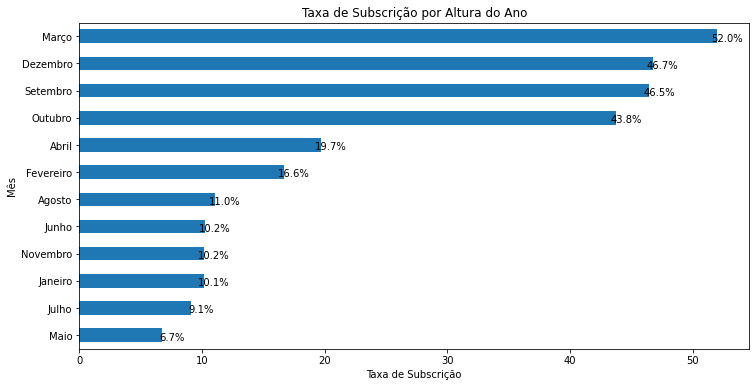

In [14]:
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Taxa de Subscrição por Altura do Ano')
plt.xlabel('Taxa de Subscrição')
plt.ylabel('Mês')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [16]:
labels = data['month'].value_counts().index
values = data['month'].value_counts().values

fig = px.pie(data, values= values, names= labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig.show()